In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_excel("/content/drive/MyDrive/Banorte/Layout_Final.xlsx")

In [3]:
df.drop_duplicates()

N_INICIATIVA                                INICIATIVA   PORTAFOLIO  \
0              1               Contratación de proveedores  RMateriales   
1              2  Optimización de resguardo de documentos.  RMateriales   
2              3         Optimización de estados de cuenta  RMateriales   
3              4             Proyectos de inversión nuevos  RMateriales   
4              5                                Mensajería  RMateriales   
5              6      Arrendamiento de sucursales y ATM's   Operaciones   
6              7                       Servicio al cliente   Fiduciario   
7              8          Instalción y renovación de ATM's  RMateriales   
8              9           Reclamaciones por fallecimiento  RMateriales   
9             10                     Cartas de Instrucción   Fiduciario   
10            11                         Pagos Programados   Fiduciario   
11            12                     Gestión de expediente   Fiduciario   
12            13                      Actualizaciones SIFE   Fiduciario   
13            14             Organismos de mejora continua   Fiduciario   
14            15                         Gestión de Tokens  Operaciones   
15            16                     Nuevas Colaboraciones   Fiduciario   
16            17                               Tablero MTM  Operaciones   
17            18                               Indicadores   Fiduciario   
18            19                     Instrucciones Legales   Fiduciario   
19            20                                  Cobranza   Fiduciario   
20            21                          Gestión de Pagos  Controlaría   
21            22                     Cobranza Domicialiada  Operaciones   
22            23                      Seguros PTJ & Cartas  Operaciones   
23            24                  Mantenimiento Preventivo  RMateriales   
24            25                         Comedor Ejecutivo  RMateriales   
25            26                       Riesgos Asegurables  RMateriales   

                    PROGRAMA ESPECIALISTA_INICIATIVA NIVEL_DE_COMPLEJIDAD  \
0        Cajeros Automaticos         Anabel Gonzalez                 ALTO   
1   Mantenimiento Correctivo        Antonio Arellano                MEDIO   
2                 Mensajeria            Marta Garcia                 ALTO   
3        Cajeros Automaticos              Raul Perez                MEDIO   
4                 Mensajeria             Monica Ruiz                 ALTO   
5                 Mensajeria           Mayra Sevilla                 ALTO   
6   Mantenimiento Correctivo           Mayra Sevilla                 ALTO   
7        Cajeros Automaticos         Anabel Gonzalez                MEDIO   
8   Mantenimiento Correctivo              Raul Perez                MEDIO   
9     Atencion a Autoridades              Raul Perez                 ALTO   
10                Mensajeria        Antonio Arellano                MEDIO   
11                Mensajeria        Antonio Arellano                 ALTO   
12                Mensajeria             Monica Ruiz                 ALTO   
13                Mensajeria           Mayra Sevilla                MEDIO   
14                Mensajeria         Anabel Gonzalez                 ALTO   
15  Mantenimiento Correctivo         Anabel Gonzalez                MEDIO   
16       Cajeros Automaticos              Raul Perez                 BAJO   
17             Mantenimiento        Antonio Arellano                 ALTO   
18              BO Derivados            Marta Garcia                 ALTO   
19    Atencion a Autoridades              Raul Perez                 ALTO   
20  Mantenimiento Correctivo           Mayra Sevilla                 ALTO   
21                Mensajeria           Mayra Sevilla                MEDIO   
22       Cajeros Automaticos        Antonio Arellano                MEDIO   
23                Mensajeria         Anabel Gonzalez                MEDIO   
24  Mantenimiento Correctivo             Monica Ruiz 

In [4]:
df.drop_duplicates()

N_INICIATIVA                                INICIATIVA   PORTAFOLIO  \
0              1               Contratación de proveedores  RMateriales   
1              2  Optimización de resguardo de documentos.  RMateriales   
2              3         Optimización de estados de cuenta  RMateriales   
3              4             Proyectos de inversión nuevos  RMateriales   
4              5                                Mensajería  RMateriales   
5              6      Arrendamiento de sucursales y ATM's   Operaciones   
6              7                       Servicio al cliente   Fiduciario   
7              8          Instalción y renovación de ATM's  RMateriales   
8              9           Reclamaciones por fallecimiento  RMateriales   
9             10                     Cartas de Instrucción   Fiduciario   
10            11                         Pagos Programados   Fiduciario   
11            12                     Gestión de expediente   Fiduciario   
12            13                      Actualizaciones SIFE   Fiduciario   
13            14             Organismos de mejora continua   Fiduciario   
14            15                         Gestión de Tokens  Operaciones   
15            16                     Nuevas Colaboraciones   Fiduciario   
16            17                               Tablero MTM  Operaciones   
17            18                               Indicadores   Fiduciario   
18            19                     Instrucciones Legales   Fiduciario   
19            20                                  Cobranza   Fiduciario   
20            21                          Gestión de Pagos  Controlaría   
21            22                     Cobranza Domicialiada  Operaciones   
22            23                      Seguros PTJ & Cartas  Operaciones   
23            24                  Mantenimiento Preventivo  RMateriales   
24            25                         Comedor Ejecutivo  RMateriales   
25            26                       Riesgos Asegurables  RMateriales   

                    PROGRAMA ESPECIALISTA_INICIATIVA NIVEL_DE_COMPLEJIDAD  \
0        Cajeros Automaticos         Anabel Gonzalez                 ALTO   
1   Mantenimiento Correctivo        Antonio Arellano                MEDIO   
2                 Mensajeria            Marta Garcia                 ALTO   
3        Cajeros Automaticos              Raul Perez                MEDIO   
4                 Mensajeria             Monica Ruiz                 ALTO   
5                 Mensajeria           Mayra Sevilla                 ALTO   
6   Mantenimiento Correctivo           Mayra Sevilla                 ALTO   
7        Cajeros Automaticos         Anabel Gonzalez                MEDIO   
8   Mantenimiento Correctivo              Raul Perez                MEDIO   
9     Atencion a Autoridades              Raul Perez                 ALTO   
10                Mensajeria        Antonio Arellano                MEDIO   
11                Mensajeria        Antonio Arellano                 ALTO   
12                Mensajeria             Monica Ruiz                 ALTO   
13                Mensajeria           Mayra Sevilla                MEDIO   
14                Mensajeria         Anabel Gonzalez                 ALTO   
15  Mantenimiento Correctivo         Anabel Gonzalez                MEDIO   
16       Cajeros Automaticos              Raul Perez                 BAJO   
17             Mantenimiento        Antonio Arellano                 ALTO   
18              BO Derivados            Marta Garcia                 ALTO   
19    Atencion a Autoridades              Raul Perez                 ALTO   
20  Mantenimiento Correctivo           Mayra Sevilla                 ALTO   
21                Mensajeria           Mayra Sevilla                MEDIO   
22       Cajeros Automaticos        Antonio Arellano                MEDIO   
23                Mensajeria         Anabel Gonzalez                MEDIO   
24  Mantenimiento Correctivo             Monica Ruiz 

In [5]:
df[['ENCUESTAS_RESPONDIDAS', 'RESPUESTAS_POSITIVAS']]

ENCUESTAS_RESPONDIDAS  RESPUESTAS_POSITIVAS
0                    2670                  2670
1                    2108                  1923
2                    3343                  3049
3                    2585                  2247
4                    2251                  2251
5                    3837                  2781
6                    2707                  2341
7                    3563                  1954
8                    2670                  1443
9                    3699                  2757
10                   1975                  1304
11                   3125                  2866
12                   3487                  2873
13                   2324                  2041
14                   2550                  2152
15                   2578                  1539
16                   3327                  2830
17                   2373                  2373
18                   2258                  2041
19                   3876                  2188
20                   2799                  1903
21                   1806                  1806
22                   2117                  1099
23                   2847                  1814
24                   1782                  1664
25                   2600                  1871

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 41 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   N_INICIATIVA                                       26 non-null     int64         
 1   INICIATIVA                                         26 non-null     object        
 2   PORTAFOLIO                                         26 non-null     object        
 3   PROGRAMA                                           26 non-null     object        
 4   ESPECIALISTA_INICIATIVA                            26 non-null     object        
 5   NIVEL_DE_COMPLEJIDAD                               26 non-null     object        
 6   ESTATUS                                            26 non-null     object        
 7   ETAPA                                              26 non-null     object        
 8   FECHA_INICIO          

In [7]:
financiero_cols = [
    'AHORRO_REAL_GENERADO',
    'AHORRO_ESPERADO',
    'COSTO_TOTAL_DE_LA_INICIATIVA',
]


df_financiero = df[financiero_cols].copy()


imputer = KNNImputer(n_neighbors=3)


df_imputed = pd.DataFrame(imputer.fit_transform(df_financiero), columns=financiero_cols)


df[financiero_cols] = df_imputed
df[financiero_cols] = df_imputed

In [8]:
cliente1_cols = ['ENCUESTAS_RESPONDIDAS', 'RESPUESTAS_POSITIVAS']
df_cliente1 = df[cliente1_cols].copy()
imputer = KNNImputer(n_neighbors=3)
df_imputed1 = pd.DataFrame(imputer.fit_transform(df_cliente1), columns=cliente1_cols)
df[cliente1_cols] = df_imputed1
df[cliente1_cols] = df[cliente1_cols].astype(int)
cliente2_cols = ['NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA', 'TOTAL_EMPLEADOS_DIRIGIDOS']
df_cliente2 = df[cliente2_cols].copy()
imputer = KNNImputer(n_neighbors=3)
df_imputed2 = pd.DataFrame(imputer.fit_transform(df_cliente2), columns=cliente2_cols)
df[cliente2_cols] = df_imputed2
df[cliente2_cols] = df[cliente2_cols].astype(int)
cliente3_cols = ['SOLICITUDES_DE_MEJORA_RECIBIDAS', 'SOLICITUDES_DE_MEJORA_IMPLEMENTADAS']
df_cliente3 = df[cliente3_cols].copy()
imputer = KNNImputer(n_neighbors=3)
df_imputed3 = pd.DataFrame(imputer.fit_transform(df_cliente3), columns=cliente3_cols)
df[cliente3_cols] = df_imputed3
df[cliente3_cols] = df[cliente3_cols].astype(int)

In [9]:
proc1_cols = ['N_TOTAL_DE_EJECUCIONES_DE_PROCESO', 'PROCESOS_EJECUTADOS_EN_TIEMPO']
df_proc1_cols = df[proc1_cols].copy()
imputer = KNNImputer(n_neighbors=3)
df_imputed4 = pd.DataFrame(imputer.fit_transform(df_proc1_cols), columns=proc1_cols)
df[proc1_cols] = df_imputed4
df[proc1_cols] = df[proc1_cols].astype(int)
proc2_cols = ['N_HITOS_PLANIFICADOS', 'N_HITOS_ALCANZADOS_EN_TIEMPO']
df_proc2_cols = df[proc2_cols].copy()
imputer = KNNImputer(n_neighbors=3)
df_imputed5 = pd.DataFrame(imputer.fit_transform(df_proc2_cols), columns=proc2_cols)
df[proc2_cols] = df_imputed5
df[proc2_cols] = df[proc2_cols].astype(int)

In [10]:
employee_cols = [
    'N_EMPLEADOS_CAPACITADOS',
    'N_EMPLEADOS_EN_AREAS_INVOLUCRADAS',
    'EMPLEADOS_RECIENTAMENTE_CAPACITADOS',
    'EMPLEADOS_CON_CALFICACION_APROBATORIA'
]


df_empleados = df[employee_cols].copy()


imputer = KNNImputer(n_neighbors=3)


df_imputed7 = pd.DataFrame(imputer.fit_transform(df_empleados), columns=employee_cols)


df[employee_cols] = df_imputed7
df[employee_cols] = df[employee_cols].astype(int)

onboarding = ['N_SOLICICTANTES_CURSANDO_ONBOARDING', 'N_SOLICICTANTES_ONBOARDING_COMPLETO']
df_onboarding = df[onboarding].copy()
imputer = KNNImputer(n_neighbors=3)
df_imputed8 = pd.DataFrame(imputer.fit_transform(df_onboarding), columns=onboarding)
df[onboarding] = df_imputed8
df[onboarding] = df[onboarding].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 41 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   N_INICIATIVA                                       26 non-null     int64         
 1   INICIATIVA                                         26 non-null     object        
 2   PORTAFOLIO                                         26 non-null     object        
 3   PROGRAMA                                           26 non-null     object        
 4   ESPECIALISTA_INICIATIVA                            26 non-null     object        
 5   NIVEL_DE_COMPLEJIDAD                               26 non-null     object        
 6   ESTATUS                                            26 non-null     object        
 7   ETAPA                                              26 non-null     object        
 8   FECHA_INICIO          

In [12]:
df[cliente1_cols]

ENCUESTAS_RESPONDIDAS  RESPUESTAS_POSITIVAS
0                    2670                  2670
1                    2108                  1923
2                    3343                  3049
3                    2585                  2247
4                    2251                  2251
5                    3837                  2781
6                    2707                  2341
7                    3563                  1954
8                    2670                  1443
9                    3699                  2757
10                   1975                  1304
11                   3125                  2866
12                   3487                  2873
13                   2324                  2041
14                   2550                  2152
15                   2578                  1539
16                   3327                  2830
17                   2373                  2373
18                   2258                  2041
19                   3876                  2188
20                   2799                  1903
21                   1806                  1806
22                   2117                  1099
23                   2847                  1814
24                   1782                  1664
25                   2600                  1871

In [13]:
df.isna().sum()

N_INICIATIVA                                         0
INICIATIVA                                           0
PORTAFOLIO                                           0
PROGRAMA                                             0
ESPECIALISTA_INICIATIVA                              0
NIVEL_DE_COMPLEJIDAD                                 0
ESTATUS                                              0
ETAPA                                                0
FECHA_INICIO                                         0
FECHA_ACTUALIZACION                                  0
FECHA_FIN                                            0
LIDER_INICIATIVA                                     0
DESCRIPCION                                          0
ACTIVIDAD                                            0
HORAS                                                0
MES                                                  0
AÑO                                                  0
NOMBRE                                               0
ESPECIALISTA_DE_PROCESO                              0
AHORRO_REAL_GENERADO                                 0
AHORRO_ESPERADO                                      0
COSTO_TOTAL_DE_LA_INICIATIVA                         0
ENCUESTAS_RESPONDIDAS                                0
RESPUESTAS_POSITIVAS                                 0
NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA      0
TOTAL_EMPLEADOS_DIRIGIDOS                            0
SOLICITUDES_DE_MEJORA_RECIBIDAS                      0
SOLICITUDES_DE_MEJORA_IMPLEMENTADAS                  0
N_TOTAL_DE_EJECUCIONES_DE_PROCESO                    0
PROCESOS_EJECUTADOS_EN_TIEMPO                        0
N_HITOS_PLANIFICADOS                                 0
N_HITOS_ALCANZADOS_EN_TIEMPO                         0
FECHA_DE_APROBACION                                  0
NUMERO_DE_INICIATIVAS_IMPLEMENTADAS_EN_EL_PERIODO    0
TIEMPO_DE_EJECUCION                                  0
N_EMPLEADOS_CAPACITADOS                              0
N_EMPLEADOS_EN_AREAS_INVOLUCRADAS                    0
EMPLEADOS_RECIENTAMENTE_CAPACITADOS                  0
EMPLEADOS_CON_CALFICACION_APROBATORIA                0
N_SOLICICTANTES_CURSANDO_ONBOARDING                  0
N_SOLICICTANTES_ONBOARDING_COMPLETO                  0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 41 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   N_INICIATIVA                                       26 non-null     int64         
 1   INICIATIVA                                         26 non-null     object        
 2   PORTAFOLIO                                         26 non-null     object        
 3   PROGRAMA                                           26 non-null     object        
 4   ESPECIALISTA_INICIATIVA                            26 non-null     object        
 5   NIVEL_DE_COMPLEJIDAD                               26 non-null     object        
 6   ESTATUS                                            26 non-null     object        
 7   ETAPA                                              26 non-null     object        
 8   FECHA_INICIO          

In [15]:
df1 = df[['AHORRO_REAL_GENERADO', 'NIVEL_DE_COMPLEJIDAD']]
df1.dropna(inplace=True)

<ipython-input-15-d395603899e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


In [16]:
  ma = df1[(df1['NIVEL_DE_COMPLEJIDAD'] == 'ALTO')]
  medianalto1 = ma['AHORRO_REAL_GENERADO'].median()
  medianalto1
  mm = df1[(df1['NIVEL_DE_COMPLEJIDAD'] == 'MEDIO')]
  medianmedio1 = mm['AHORRO_REAL_GENERADO'].median()
  mb = df1[(df1['NIVEL_DE_COMPLEJIDAD'] == 'BAJO')]
  medianbajo1 = mb['AHORRO_REAL_GENERADO'].median()

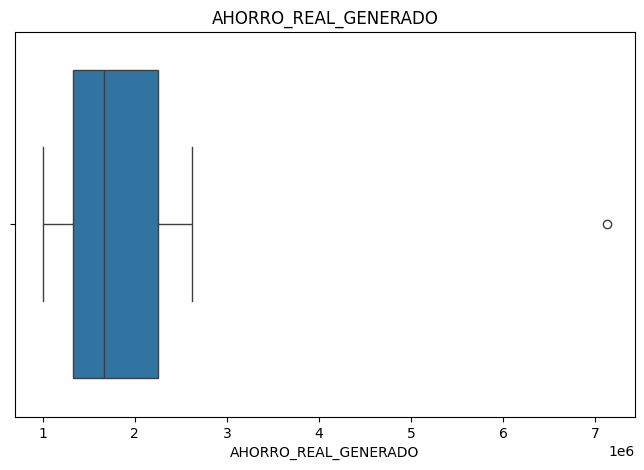

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['AHORRO_REAL_GENERADO'])
plt.title("AHORRO_REAL_GENERADO")
plt.show()

In [18]:
Q1 = df['AHORRO_REAL_GENERADO'].quantile(0.25)
Q3 = df['AHORRO_REAL_GENERADO'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
def outliers1(row):
  nivel = row['NIVEL_DE_COMPLEJIDAD']
  if nivel in ['ALTA', 'MUY ALTA'] and row['AHORRO_REAL_GENERADO'] < lower_bound or row['AHORRO_REAL_GENERADO'] > upper_bound:
    return medianalto1
  elif row['NIVEL_DE_COMPLEJIDAD'] == 'MEDIO' and row['AHORRO_REAL_GENERADO'] < lower_bound or row['AHORRO_REAL_GENERADO'] > upper_bound:
    return medianmedio1
  elif row['NIVEL_DE_COMPLEJIDAD'] == 'BAJO' and row['AHORRO_REAL_GENERADO'] < lower_bound or row['AHORRO_REAL_GENERADO'] > upper_bound:
    return medianbajo1
  else:
        return row['AHORRO_REAL_GENERADO']
df['AHORRO_REAL_GENERADO'] = df.apply(outliers1, axis = 1)
def janitor1(row):
  if row['NIVEL_DE_COMPLEJIDAD'] == 'BAJO' and pd.isna(row['AHORRO_REAL_GENERADO']):
    return medianmedio2
  else:
    return row['AHORRO_REAL_GENERADO']
df['AHORRO_REAL_GENERADO'] = df.apply(janitor1, axis = 1)

In [19]:
df1 = df[['AHORRO_ESPERADO', 'NIVEL_DE_COMPLEJIDAD']]
df1.dropna(inplace=True)
ma = df1[(df1['NIVEL_DE_COMPLEJIDAD'] == 'ALTO')]
medianalto2 = ma['AHORRO_ESPERADO'].median()
medianalto2
mm = df1[(df1['NIVEL_DE_COMPLEJIDAD'] == 'MEDIO')]
medianmedio2 = mm['AHORRO_ESPERADO'].median()
mb = df1[(df1['NIVEL_DE_COMPLEJIDAD'] == 'BAJO')]
medianbajo2 = mb['AHORRO_ESPERADO'].median()

<ipython-input-19-cb2fffd31b9c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


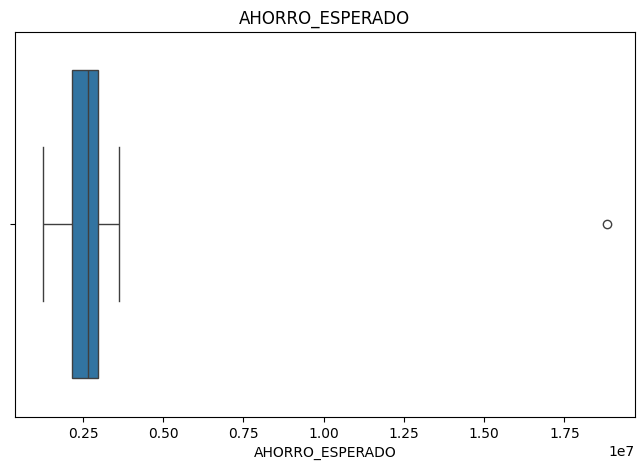

In [20]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['AHORRO_ESPERADO'])
plt.title("AHORRO_ESPERADO")
plt.show()

In [21]:
Q1 = df['AHORRO_ESPERADO'].quantile(0.25)
Q3 = df['AHORRO_ESPERADO'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
def outliers1(row):
  nivel = row['NIVEL_DE_COMPLEJIDAD']
  if nivel in ['ALTA', 'MUY ALTA'] and row['AHORRO_ESPERADO'] < lower_bound or row['AHORRO_ESPERADO'] > upper_bound:
    return medianalto2
  elif row['NIVEL_DE_COMPLEJIDAD'] == 'MEDIO' and row['AHORRO_ESPERADO'] < lower_bound or row['AHORRO_ESPERADO'] > upper_bound:
    return medianmedio2
  elif row['NIVEL_DE_COMPLEJIDAD'] == 'BAJO' and row['AHORRO_ESPERADO'] < lower_bound or row['AHORRO_ESPERADO'] > upper_bound:
    return medianbajo2
  else:
        return row['AHORRO_ESPERADO']
df['AHORRO_ESPERADO'] = df.apply(outliers1, axis = 1)
def janitor1(row):
  if row['NIVEL_DE_COMPLEJIDAD'] == 'BAJO' and pd.isna(row['AHORRO_ESPERADO']):
    return medianmedio2
  else:
    return row['AHORRO_ESPERADO']
df['AHORRO_ESPERADO'] = df.apply(janitor1, axis = 1)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 41 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   N_INICIATIVA                                       26 non-null     int64         
 1   INICIATIVA                                         26 non-null     object        
 2   PORTAFOLIO                                         26 non-null     object        
 3   PROGRAMA                                           26 non-null     object        
 4   ESPECIALISTA_INICIATIVA                            26 non-null     object        
 5   NIVEL_DE_COMPLEJIDAD                               26 non-null     object        
 6   ESTATUS                                            26 non-null     object        
 7   ETAPA                                              26 non-null     object        
 8   FECHA_INICIO          

In [23]:
df1 = df[['COSTO_TOTAL_DE_LA_INICIATIVA', 'NIVEL_DE_COMPLEJIDAD']]
df1.dropna(inplace=True)
ma = df1[(df1['NIVEL_DE_COMPLEJIDAD'] == 'ALTO')]
medianalto1 = ma['COSTO_TOTAL_DE_LA_INICIATIVA'].median()
medianalto1
mm = df1[(df1['NIVEL_DE_COMPLEJIDAD'] == 'MEDIO')]
medianmedio1 = mm['COSTO_TOTAL_DE_LA_INICIATIVA'].median()
mb = df1[(df1['NIVEL_DE_COMPLEJIDAD'] == 'BAJO')]
medianbajo1 = mb['COSTO_TOTAL_DE_LA_INICIATIVA'].median()

<ipython-input-23-a5391ed66b23>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


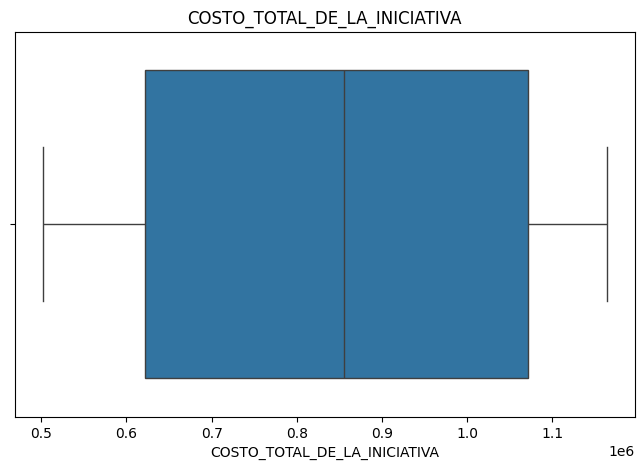

In [24]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['COSTO_TOTAL_DE_LA_INICIATIVA'])
plt.title("COSTO_TOTAL_DE_LA_INICIATIVA")
plt.show()

In [25]:
Q1 = df['COSTO_TOTAL_DE_LA_INICIATIVA'].quantile(0.25)
Q3 = df['COSTO_TOTAL_DE_LA_INICIATIVA'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
def outliers(row):
  nivel = row['NIVEL_DE_COMPLEJIDAD']
  if nivel in ['ALTA', 'MUY ALTA'] and row['COSTO_TOTAL_DE_LA_INICIATIVA'] < lower_bound or row['COSTO_TOTAL_DE_LA_INICIATIVA'] > upper_bound:
    return medianalto1
  elif row['NIVEL_DE_COMPLEJIDAD'] == 'MEDIO' and row['COSTO_TOTAL_DE_LA_INICIATIVA'] < lower_bound or row['COSTO_TOTAL_DE_LA_INICIATIVA'] > upper_bound:
    return medianmedio1
  elif row['NIVEL_DE_COMPLEJIDAD'] == 'BAJO' and row['COSTO_TOTAL_DE_LA_INICIATIVA'] < lower_bound or row['COSTO_TOTAL_DE_LA_INICIATIVA'] > upper_bound:
    return medianbajo1
  else:
        return row['COSTO_TOTAL_DE_LA_INICIATIVA']
df['COSTO_TOTAL_DE_LA_INICIATIVA'] = df.apply(outliers, axis = 1)
def janitor(row):
  if row['NIVEL_DE_COMPLEJIDAD'] == 'BAJO' and pd.isna(row['COSTO_TOTAL_DE_LA_INICIATIVA']):
    return medianmedio1
  else:
    return row['COSTO_TOTAL_DE_LA_INICIATIVA']
df['COSTO_TOTAL_DE_LA_INICIATIVA'] = df.apply(janitor, axis = 1)

In [26]:
df1 = df[['COSTO_TOTAL_DE_LA_INICIATIVA', 'NIVEL_DE_COMPLEJIDAD']]
df1.dropna(inplace=True)
ma = df1[(df1['NIVEL_DE_COMPLEJIDAD'] == 'ALTO')]
medianalto1 = ma['COSTO_TOTAL_DE_LA_INICIATIVA'].median()
medianalto1
mm = df1[(df1['NIVEL_DE_COMPLEJIDAD'] == 'MEDIO')]
medianmedio1 = mm['COSTO_TOTAL_DE_LA_INICIATIVA'].median()
mb = df1[(df1['NIVEL_DE_COMPLEJIDAD'] == 'BAJO')]
medianbajo1 = mb['COSTO_TOTAL_DE_LA_INICIATIVA'].median()

<ipython-input-26-a5391ed66b23>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


In [27]:
df2 = df[['ENCUESTAS_RESPONDIDAS', 'RESPUESTAS_POSITIVAS']]
df2.dropna(inplace=True)
df2['satisfacción'] = df2['RESPUESTAS_POSITIVAS']/df2['ENCUESTAS_RESPONDIDAS']
medianmeasure = df2['satisfacción'].median()
medianmeasure
medianalto3 = df2['ENCUESTAS_RESPONDIDAS'].median()

<ipython-input-27-3c51562c79b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)
<ipython-input-27-3c51562c79b0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['satisfacción'] = df2['RESPUESTAS_POSITIVAS']/df2['ENCUESTAS_RESPONDIDAS']


In [28]:
df2

ENCUESTAS_RESPONDIDAS  RESPUESTAS_POSITIVAS  satisfacción
0                    2670                  2670      1.000000
1                    2108                  1923      0.912239
2                    3343                  3049      0.912055
3                    2585                  2247      0.869246
4                    2251                  2251      1.000000
5                    3837                  2781      0.724785
6                    2707                  2341      0.864795
7                    3563                  1954      0.548414
8                    2670                  1443      0.540449
9                    3699                  2757      0.745337
10                   1975                  1304      0.660253
11                   3125                  2866      0.917120
12                   3487                  2873      0.823917
13                   2324                  2041      0.878227
14                   2550                  2152      0.843922
15                   2578                  1539      0.596974
16                   3327                  2830      0.850616
17                   2373                  2373      1.000000
18                   2258                  2041      0.903897
19                   3876                  2188      0.564499
20                   2799                  1903      0.679886
21                   1806                  1806      1.000000
22                   2117                  1099      0.519131
23                   2847                  1814      0.637162
24                   1782                  1664      0.933782
25                   2600                  1871      0.719615

In [29]:
df1 = df[['ENCUESTAS_RESPONDIDAS', 'NIVEL_DE_COMPLEJIDAD']]
df1.dropna(inplace=True)
ma = df1[(df1['NIVEL_DE_COMPLEJIDAD'] == 'ALTO')]
medianalto1 = ma['ENCUESTAS_RESPONDIDAS'].median()
medianalto1
mm = df1[(df1['NIVEL_DE_COMPLEJIDAD'] == 'MEDIO')]
medianmedio1 = mm['ENCUESTAS_RESPONDIDAS'].median()
mb = df1[(df1['NIVEL_DE_COMPLEJIDAD'] == 'BAJO')]
medianbajo1 = mb['ENCUESTAS_RESPONDIDAS'].median()

<ipython-input-29-a6d08d4156a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


In [30]:
df['ENCUESTAS_RESPONDIDAS'] = df['ENCUESTAS_RESPONDIDAS'].astype(int)

In [31]:
df['ENCUESTAS_RESPONDIDAS']

0     2670
1     2108
2     3343
3     2585
4     2251
5     3837
6     2707
7     3563
8     2670
9     3699
10    1975
11    3125
12    3487
13    2324
14    2550
15    2578
16    3327
17    2373
18    2258
19    3876
20    2799
21    1806
22    2117
23    2847
24    1782
25    2600
Name: ENCUESTAS_RESPONDIDAS, dtype: int64

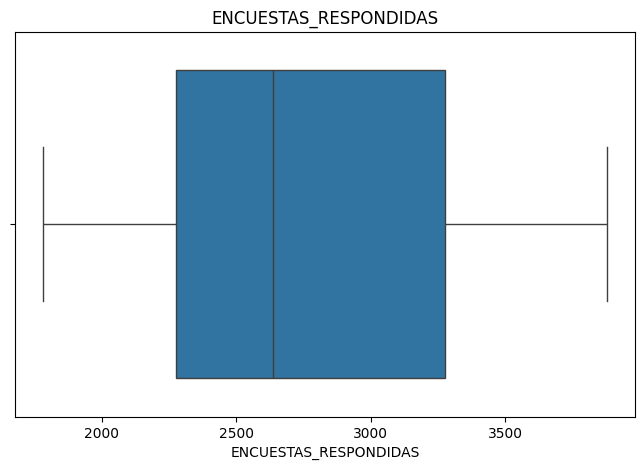

In [32]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['ENCUESTAS_RESPONDIDAS'])
plt.title("ENCUESTAS_RESPONDIDAS")
plt.show()

El Tratamiento de los Outliers

In [33]:
Q1 = df['ENCUESTAS_RESPONDIDAS'].quantile(0.25)
Q3 = df['ENCUESTAS_RESPONDIDAS'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
def outliers(row):
  nivel = row['NIVEL_DE_COMPLEJIDAD']
  if nivel in ['ALTA', 'MUY ALTA'] and row['ENCUESTAS_RESPONDIDAS'] < lower_bound or row['ENCUESTAS_RESPONDIDAS'] > upper_bound and pd.isna(row['RESPUESTAS_POSITIVAS']):
    return medianalto1
  elif nivel in ['ALTA', 'MUY ALTA'] and row['ENCUESTAS_RESPONDIDAS'] < lower_bound or row['ENCUESTAS_RESPONDIDAS'] > upper_bound and pd.notna(row['RESPUESTAS_POSITIVAS']):
    return row['RESPUESTAS_POSITIVAS']/medianmeasure
  elif row['NIVEL_DE_COMPLEJIDAD'] == 'MEDIO' and row['ENCUESTAS_RESPONDIDAS'] < lower_bound or row['ENCUESTAS_RESPONDIDAS'] > upper_bound and pd.isna(row['RESPUESTAS_POSITIVAS']):
    return medianmedio1
  elif row['NIVEL_DE_COMPLEJIDAD'] == 'MEDIO' and row['ENCUESTAS_RESPONDIDAS'] < lower_bound or row['ENCUESTAS_RESPONDIDAS'] > upper_bound and pd.notna(row['RESPUESTAS_POSITIVAS']):
    return row['RESPUESTAS_POSITIVAS']/medianmeasure
  elif row['NIVEL_DE_COMPLEJIDAD'] == 'BAJO' and row['ENCUESTAS_RESPONDIDAS'] < lower_bound or row['ENCUESTAS_RESPONDIDAS'] > upper_bound and pd.isna(row['RESPUESTAS_POSITIVAS']):
    return medianbajo1
  elif row['NIVEL_DE_COMPLEJIDAD'] == 'BAJO' and row['ENCUESTAS_RESPONDIDAS'] < lower_bound or row['ENCUESTAS_RESPONDIDAS'] > upper_bound and pd.notna(row['RESPUESTAS_POSITIVAS']):
    return row['RESPUESTAS_POSITIVAS']/medianmeasure
  else:
        return row['ENCUESTAS_RESPONDIDAS']
df['ENCUESTAS_RESPONDIDAS'] = df.apply(outliers, axis = 1)
def janitor(row):
  if row['NIVEL_DE_COMPLEJIDAD'] == 'BAJO' and pd.isna(row['ENCUESTAS_RESPONDIDAS'])and pd.isna(row['RESPUESTAS_POSITIVAS']):
    return medianmedio1
  elif row['NIVEL_DE_COMPLEJIDAD'] == 'BAJO' and pd.isna(row['ENCUESTAS_RESPONDIDAS']) and pd.notna(row['RESPUESTAS_POSITIVAS']):
        return row['RESPUESTAS_POSITIVAS']/medianmeasure
  else:
    return row['ENCUESTAS_RESPONDIDAS']
df['ENCUESTAS_RESPONDIDAS'] = df.apply(janitor, axis = 1)

In [34]:
df1 = df[['RESPUESTAS_POSITIVAS', 'NIVEL_DE_COMPLEJIDAD']]
df1.dropna(inplace=True)
ma = df1[(df1['NIVEL_DE_COMPLEJIDAD'] == 'ALTO')]
medianalto1 = ma['RESPUESTAS_POSITIVAS'].median()
medianalto1
mm = df1[(df1['NIVEL_DE_COMPLEJIDAD'] == 'MEDIO')]
medianmedio1 = mm['RESPUESTAS_POSITIVAS'].median()
mb = df1[(df1['NIVEL_DE_COMPLEJIDAD'] == 'BAJO')]
medianbajo1 = mb['RESPUESTAS_POSITIVAS'].median()

<ipython-input-34-a2bbfedfab05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


In [35]:
df['RESPUESTAS_POSITIVAS'] = df['RESPUESTAS_POSITIVAS'].astype(int)

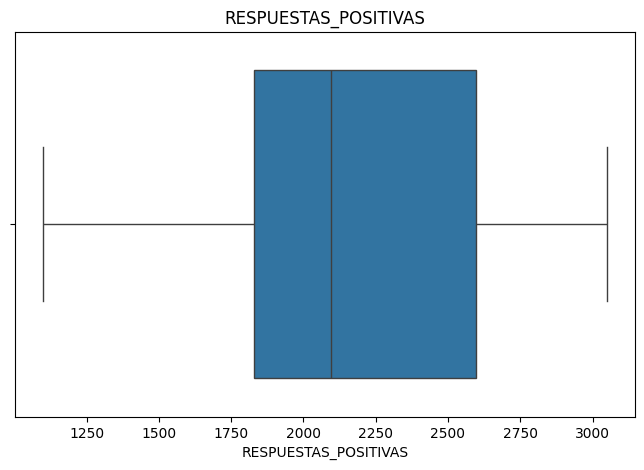

In [36]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['RESPUESTAS_POSITIVAS'])
plt.title("RESPUESTAS_POSITIVAS")
plt.show()

In [37]:
Q1 = df['RESPUESTAS_POSITIVAS'].quantile(0.25)
Q3 = df['RESPUESTAS_POSITIVAS'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

def outliers(row):
    nivel = row['NIVEL_DE_COMPLEJIDAD']
    if nivel in ['ALTA', 'MUY ALTA'] and (row['RESPUESTAS_POSITIVAS'] < lower_bound or row['RESPUESTAS_POSITIVAS'] > upper_bound) and pd.isna(row['ENCUESTAS_RESPONDIDAS']):
        return medianalto1
    elif nivel in ['ALTA', 'MUY ALTA'] and (row['RESPUESTAS_POSITIVAS'] < lower_bound or row['RESPUESTAS_POSITIVAS'] > upper_bound) and pd.notna(row['ENCUESTAS_RESPONDIDAS']):
        return row['ENCUESTAS_RESPONDIDAS'] * medianmeasure
    elif row['NIVEL_DE_COMPLEJIDAD'] == 'MEDIO' and (row['RESPUESTAS_POSITIVAS'] < lower_bound or row['RESPUESTAS_POSITIVAS'] > upper_bound) and pd.isna(row['ENCUESTAS_RESPONDIDAS']):
        return medianmedio1
    elif row['NIVEL_DE_COMPLEJIDAD'] == 'MEDIO' and (row['RESPUESTAS_POSITIVAS'] < lower_bound or row['RESPUESTAS_POSITIVAS'] > upper_bound) and pd.notna(row['ENCUESTAS_RESPONDIDAS']):
        return row['ENCUESTAS_RESPONDIDAS'] * medianmeasure
    elif row['NIVEL_DE_COMPLEJIDAD'] == 'BAJO' and (row['RESPUESTAS_POSITIVAS'] < lower_bound or row['RESPUESTAS_POSITIVAS'] > upper_bound) and pd.isna(row['ENCUESTAS_RESPONDIDAS']):
        return medianbajo1
    elif row['NIVEL_DE_COMPLEJIDAD'] == 'BAJO' and (row['RESPUESTAS_POSITIVAS'] < lower_bound or row['RESPUESTAS_POSITIVAS'] > upper_bound) and pd.notna(row['ENCUESTAS_RESPONDIDAS']):
        return row['ENCUESTAS_RESPONDIDAS'] * medianmeasure
    else:
        return row['RESPUESTAS_POSITIVAS']

df['RESPUESTAS_POSITIVAS'] = df.apply(outliers, axis=1)

def janitor(row):
    if row['NIVEL_DE_COMPLEJIDAD'] == 'BAJO' and pd.isna(row['RESPUESTAS_POSITIVAS']) and pd.isna(row['ENCUESTAS_RESPONDIDAS']):
        return medianmedio1
    elif row['NIVEL_DE_COMPLEJIDAD'] == 'BAJO' and pd.isna(row['RESPUESTAS_POSITIVAS']) and pd.notna(row['ENCUESTAS_RESPONDIDAS']):
        return row['ENCUESTAS_RESPONDIDAS'] * medianmeasure
    else:
        return row['RESPUESTAS_POSITIVAS']

df['RESPUESTAS_POSITIVAS'] = df.apply(janitor, axis=1)


In [38]:
df.isna().sum()

N_INICIATIVA                                         0
INICIATIVA                                           0
PORTAFOLIO                                           0
PROGRAMA                                             0
ESPECIALISTA_INICIATIVA                              0
NIVEL_DE_COMPLEJIDAD                                 0
ESTATUS                                              0
ETAPA                                                0
FECHA_INICIO                                         0
FECHA_ACTUALIZACION                                  0
FECHA_FIN                                            0
LIDER_INICIATIVA                                     0
DESCRIPCION                                          0
ACTIVIDAD                                            0
HORAS                                                0
MES                                                  0
AÑO                                                  0
NOMBRE                                               0
ESPECIALISTA_DE_PROCESO                              0
AHORRO_REAL_GENERADO                                 0
AHORRO_ESPERADO                                      0
COSTO_TOTAL_DE_LA_INICIATIVA                         0
ENCUESTAS_RESPONDIDAS                                0
RESPUESTAS_POSITIVAS                                 0
NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA      0
TOTAL_EMPLEADOS_DIRIGIDOS                            0
SOLICITUDES_DE_MEJORA_RECIBIDAS                      0
SOLICITUDES_DE_MEJORA_IMPLEMENTADAS                  0
N_TOTAL_DE_EJECUCIONES_DE_PROCESO                    0
PROCESOS_EJECUTADOS_EN_TIEMPO                        0
N_HITOS_PLANIFICADOS                                 0
N_HITOS_ALCANZADOS_EN_TIEMPO                         0
FECHA_DE_APROBACION                                  0
NUMERO_DE_INICIATIVAS_IMPLEMENTADAS_EN_EL_PERIODO    0
TIEMPO_DE_EJECUCION                                  0
N_EMPLEADOS_CAPACITADOS                              0
N_EMPLEADOS_EN_AREAS_INVOLUCRADAS                    0
EMPLEADOS_RECIENTAMENTE_CAPACITADOS                  0
EMPLEADOS_CON_CALFICACION_APROBATORIA                0
N_SOLICICTANTES_CURSANDO_ONBOARDING                  0
N_SOLICICTANTES_ONBOARDING_COMPLETO                  0
dtype: int64

In [39]:
df2 = df[['NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA', 'TOTAL_EMPLEADOS_DIRIGIDOS']]
df2.dropna(inplace=True)
df2['satisfacción'] = df2['NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA']/df2['TOTAL_EMPLEADOS_DIRIGIDOS']
medianmeasure = df2['satisfacción'].median()
medianmeasure

<ipython-input-39-7d31afaedbc0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)
<ipython-input-39-7d31afaedbc0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['satisfacción'] = df2['NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA']/df2['TOTAL_EMPLEADOS_DIRIGIDOS']


0.7124252752036259

In [40]:
df1 = df[['NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA', 'NIVEL_DE_COMPLEJIDAD']]
df1.dropna(inplace=True)
ma = df1[(df1['NIVEL_DE_COMPLEJIDAD'] == 'ALTO')]
medianalto1 = ma['NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA'].median()
medianalto1
mm = df1[(df1['NIVEL_DE_COMPLEJIDAD'] == 'MEDIO')]
medianmedio1 = mm['NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA'].median()
mb = df1[(df1['NIVEL_DE_COMPLEJIDAD'] == 'BAJO')]
medianbajo1 = mb['NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA'].median()

<ipython-input-40-865329f27ee8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


In [41]:
df['NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA'] = df['NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA'].astype(int)

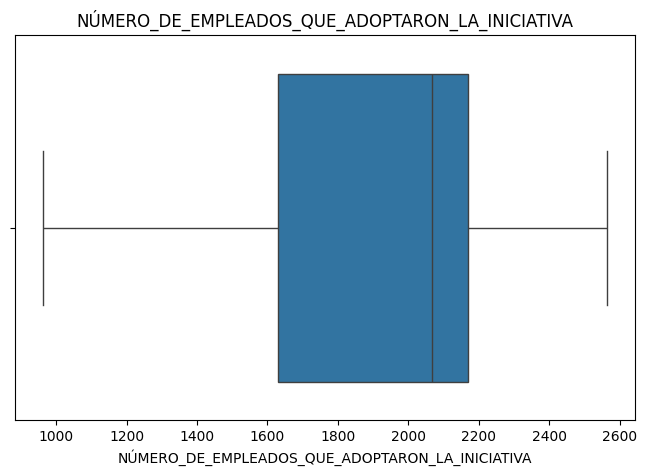

In [42]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA'])
plt.title("NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA")
plt.show()

In [43]:
Q1 = df['NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA'].quantile(0.25)
Q3 = df['NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

def outliers(row):
    nivel = row['NIVEL_DE_COMPLEJIDAD']
    if nivel in ['ALTA', 'MUY ALTA'] and (row['NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA'] < lower_bound or row['NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA'] > upper_bound) and pd.isna(row['TOTAL_EMPLEADOS_DIRIGIDOS']):
        return medianalto1
    elif nivel in ['ALTA', 'MUY ALTA'] and (row['NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA'] < lower_bound or row['NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA'] > upper_bound) and pd.notna(row['TOTAL_EMPLEADOS_DIRIGIDOS']):
        return row['TOTAL_EMPLEADOS_DIRIGIDOS'] * medianmeasure
    elif row['NIVEL_DE_COMPLEJIDAD'] == 'MEDIO' and (row['NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA'] < lower_bound or row['NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA'] > upper_bound) and pd.isna(row['TOTAL_EMPLEADOS_DIRIGIDOS']):
        return medianmedio1
    elif row['NIVEL_DE_COMPLEJIDAD'] == 'MEDIO' and (row['NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA'] < lower_bound or row['NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA'] > upper_bound) and pd.notna(row['TOTAL_EMPLEADOS_DIRIGIDOS']):
        return row['TOTAL_EMPLEADOS_DIRIGIDOS'] * medianmeasure
    elif row['NIVEL_DE_COMPLEJIDAD'] == 'BAJO' and (row['NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA'] < lower_bound or row['NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA'] > upper_bound) and pd.isna(row['TOTAL_EMPLEADOS_DIRIGIDOS']):
        return medianbajo1
    elif row['NIVEL_DE_COMPLEJIDAD'] == 'BAJO' and (row['NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA'] < lower_bound or row['NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA'] > upper_bound) and pd.notna(row['TOTAL_EMPLEADOS_DIRIGIDOS']):
        return row['TOTAL_EMPLEADOS_DIRIGIDOS'] * medianmeasure
    else:
        return row['NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA']

df['NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA'] = df.apply(outliers, axis=1)

def janitor(row):
    if row['NIVEL_DE_COMPLEJIDAD'] == 'BAJO' and pd.isna(row['NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA']) and pd.isna(row['TOTAL_EMPLEADOS_DIRIGIDOS']):
        return medianmedio1
    elif row['NIVEL_DE_COMPLEJIDAD'] == 'BAJO' and pd.isna(row['NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA']) and pd.notna(row['TOTAL_EMPLEADOS_DIRIGIDOS']):
        return row['TOTAL_EMPLEADOS_DIRIGIDOS'] * medianmeasure
    else:
        return row['NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA']

df['NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA'] = df.apply(janitor, axis=1)


In [44]:
df1 = df[['TOTAL_EMPLEADOS_DIRIGIDOS', 'NIVEL_DE_COMPLEJIDAD']]
df1.dropna(inplace=True)
ma = df1[(df1['NIVEL_DE_COMPLEJIDAD'] == 'ALTO')]
medianalto1 = ma['TOTAL_EMPLEADOS_DIRIGIDOS'].median()
medianalto1
mm = df1[(df1['NIVEL_DE_COMPLEJIDAD'] == 'MEDIO')]
medianmedio1 = mm['TOTAL_EMPLEADOS_DIRIGIDOS'].median()
mb = df1[(df1['NIVEL_DE_COMPLEJIDAD'] == 'BAJO')]
medianbajo1 = mb['TOTAL_EMPLEADOS_DIRIGIDOS'].median()

<ipython-input-44-168b8b0b19f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


In [45]:
df['TOTAL_EMPLEADOS_DIRIGIDOS'] = df['TOTAL_EMPLEADOS_DIRIGIDOS'].astype(int)

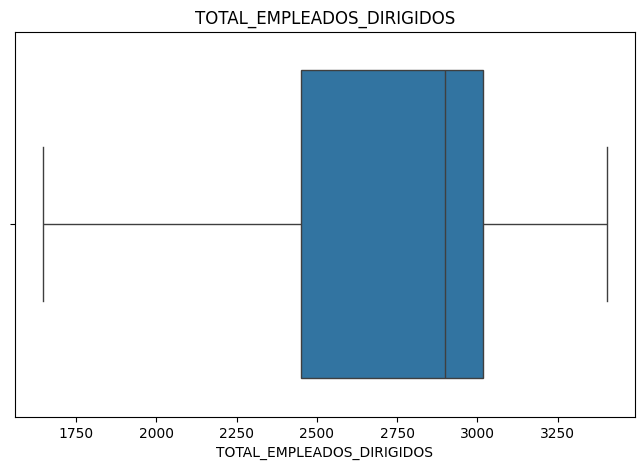

In [46]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['TOTAL_EMPLEADOS_DIRIGIDOS'])
plt.title("TOTAL_EMPLEADOS_DIRIGIDOS")
plt.show()

In [47]:
Q1 = df['TOTAL_EMPLEADOS_DIRIGIDOS'].quantile(0.25)
Q3 = df['TOTAL_EMPLEADOS_DIRIGIDOS'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

def outliers(row):
    val = row['TOTAL_EMPLEADOS_DIRIGIDOS']
    nivel = row['NIVEL_DE_COMPLEJIDAD']
    if nivel in ['ALTA', 'MUY ALTA'] and (val < lower_bound or val > upper_bound) and pd.isna(row['NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA']):
        return medianalto1
    elif nivel in ['ALTA', 'MUY ALTA'] and (val < lower_bound or val > upper_bound) and pd.notna(row['NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA']):
        return row['NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA'] / medianmeasure
    elif row['NIVEL_DE_COMPLEJIDAD'] == 'MEDIO' and (val < lower_bound or val > upper_bound) and pd.isna(row['NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA']):
        return medianmedio1
    elif row['NIVEL_DE_COMPLEJIDAD'] == 'MEDIO' and (val < lower_bound or val > upper_bound) and pd.notna(row['NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA']):
        return row['NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA'] / medianmeasure
    elif row['NIVEL_DE_COMPLEJIDAD'] == 'BAJO' and (val < lower_bound or val > upper_bound) and pd.isna(row['NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA']):
        return medianbajo1
    elif row['NIVEL_DE_COMPLEJIDAD'] == 'BAJO' and (val < lower_bound or val > upper_bound) and pd.notna(row['NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA']):
        return row['NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA'] / medianmeasure
    else:
        return val

df['TOTAL_EMPLEADOS_DIRIGIDOS'] = df.apply(outliers, axis=1)

def janitor(row):
    if row['NIVEL_DE_COMPLEJIDAD'] == 'BAJO' and pd.isna(row['TOTAL_EMPLEADOS_DIRIGIDOS']) and pd.isna(row['NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA']):
        return medianmedio1
    elif row['NIVEL_DE_COMPLEJIDAD'] == 'BAJO' and pd.isna(row['TOTAL_EMPLEADOS_DIRIGIDOS']) and pd.notna(row['NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA']):
        return row['NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA'] / medianmeasure
    else:
        return row['TOTAL_EMPLEADOS_DIRIGIDOS']

df['TOTAL_EMPLEADOS_DIRIGIDOS'] = df.apply(janitor, axis=1)


In [48]:
df2 = df[['SOLICITUDES_DE_MEJORA_RECIBIDAS', 'SOLICITUDES_DE_MEJORA_IMPLEMENTADAS']]
df2.dropna(inplace=True)
df2['satisfacción'] = df2['SOLICITUDES_DE_MEJORA_IMPLEMENTADAS']/df2['SOLICITUDES_DE_MEJORA_RECIBIDAS']
medianmeasure = df2['satisfacción'].median()
medianmeasure

<ipython-input-48-12acc933bd51>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)
<ipython-input-48-12acc933bd51>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['satisfacción'] = df2['SOLICITUDES_DE_MEJORA_IMPLEMENTADAS']/df2['SOLICITUDES_DE_MEJORA_RECIBIDAS']


0.6884174727798595

In [49]:
df1 = df[['SOLICITUDES_DE_MEJORA_RECIBIDAS', 'NIVEL_DE_COMPLEJIDAD']]
df1.dropna(inplace=True)
ma = df1[(df1['NIVEL_DE_COMPLEJIDAD'] == 'ALTO')]
medianalto1 = ma['SOLICITUDES_DE_MEJORA_RECIBIDAS'].median()
medianalto1
mm = df1[(df1['NIVEL_DE_COMPLEJIDAD'] == 'MEDIO')]
medianmedio1 = mm['SOLICITUDES_DE_MEJORA_RECIBIDAS'].median()
mb = df1[(df1['NIVEL_DE_COMPLEJIDAD'] == 'BAJO')]
medianbajo1 = mb['SOLICITUDES_DE_MEJORA_RECIBIDAS'].median()

<ipython-input-49-a5a6dcd1adc4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


In [50]:
df['SOLICITUDES_DE_MEJORA_RECIBIDAS'] = df['SOLICITUDES_DE_MEJORA_RECIBIDAS'].astype(int)

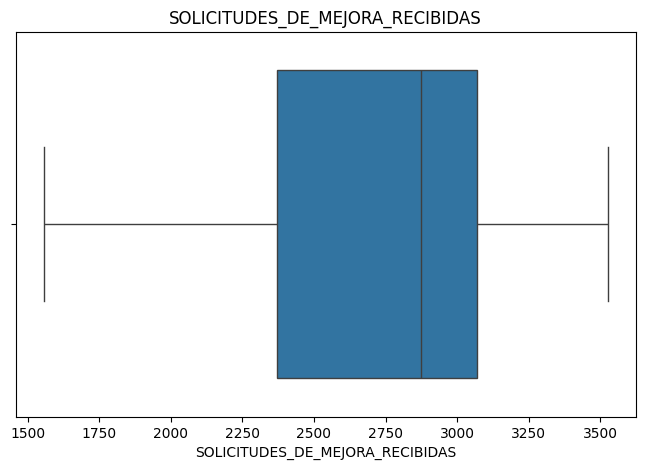

In [51]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['SOLICITUDES_DE_MEJORA_RECIBIDAS'])
plt.title("SOLICITUDES_DE_MEJORA_RECIBIDAS")
plt.show()

In [52]:
Q1 = df['SOLICITUDES_DE_MEJORA_RECIBIDAS'].quantile(0.25)
Q3 = df['SOLICITUDES_DE_MEJORA_RECIBIDAS'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

def outliers(row):
    val = row['SOLICITUDES_DE_MEJORA_RECIBIDAS']
    nivel = row['NIVEL_DE_COMPLEJIDAD']
    if nivel in ['ALTA', 'MUY ALTA'] and (val < lower_bound or val > upper_bound) and pd.isna(row['SOLICITUDES_DE_MEJORA_IMPLEMENTADAS']):
        return medianalto1
    elif nivel in ['ALTA', 'MUY ALTA'] and (val < lower_bound or val > upper_bound) and pd.notna(row['SOLICITUDES_DE_MEJORA_IMPLEMENTADAS']):
        return row['SOLICITUDES_DE_MEJORA_IMPLEMENTADAS'] / medianmeasure
    elif row['NIVEL_DE_COMPLEJIDAD'] == 'MEDIO' and (val < lower_bound or val > upper_bound) and pd.isna(row['SOLICITUDES_DE_MEJORA_IMPLEMENTADAS']):
        return medianmedio1
    elif row['NIVEL_DE_COMPLEJIDAD'] == 'MEDIO' and (val < lower_bound or val > upper_bound) and pd.notna(row['SOLICITUDES_DE_MEJORA_IMPLEMENTADAS']):
        return row['SOLICITUDES_DE_MEJORA_IMPLEMENTADAS'] / medianmeasure
    elif row['NIVEL_DE_COMPLEJIDAD'] == 'BAJO' and (val < lower_bound or val > upper_bound) and pd.isna(row['SOLICITUDES_DE_MEJORA_IMPLEMENTADAS']):
        return medianbajo1
    elif row['NIVEL_DE_COMPLEJIDAD'] == 'BAJO' and (val < lower_bound or val > upper_bound) and pd.notna(row['SOLICITUDES_DE_MEJORA_IMPLEMENTADAS']):
        return row['SOLICITUDES_DE_MEJORA_IMPLEMENTADAS'] / medianmeasure
    else:
        return val

df['SOLICITUDES_DE_MEJORA_RECIBIDAS'] = df.apply(outliers, axis=1)


In [53]:
df1 = df[['NIVEL_DE_COMPLEJIDAD', 'SOLICITUDES_DE_MEJORA_IMPLEMENTADAS']]
df1.dropna(inplace=True)
ma = df1[(df1['NIVEL_DE_COMPLEJIDAD'] == 'ALTO')]
medianalto1 = ma['SOLICITUDES_DE_MEJORA_IMPLEMENTADAS'].median()
medianalto1
mm = df1[(df1['NIVEL_DE_COMPLEJIDAD'] == 'MEDIO')]
medianmedio1 = mm['SOLICITUDES_DE_MEJORA_IMPLEMENTADAS'].median()
mb = df1[(df1['NIVEL_DE_COMPLEJIDAD'] == 'BAJO')]
medianbajo1 = mb['SOLICITUDES_DE_MEJORA_IMPLEMENTADAS'].median()

<ipython-input-53-ce1677454d94>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


In [54]:
df['SOLICITUDES_DE_MEJORA_IMPLEMENTADAS'] = df['SOLICITUDES_DE_MEJORA_IMPLEMENTADAS'].astype(int)

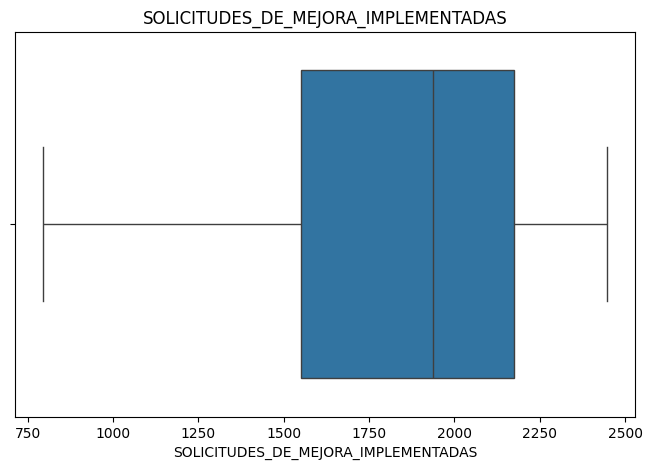

In [55]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['SOLICITUDES_DE_MEJORA_IMPLEMENTADAS'])
plt.title("SOLICITUDES_DE_MEJORA_IMPLEMENTADAS")
plt.show()

In [56]:
Q1 = df['SOLICITUDES_DE_MEJORA_IMPLEMENTADAS'].quantile(0.25)
Q3 = df['SOLICITUDES_DE_MEJORA_IMPLEMENTADAS'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

def outliers(row):
    val = row['SOLICITUDES_DE_MEJORA_IMPLEMENTADAS']
    nivel = row['NIVEL_DE_COMPLEJIDAD']
    if nivel in ['ALTA', 'MUY ALTA'] and (val < lower_bound or val > upper_bound) and pd.isna(row['SOLICITUDES_DE_MEJORA_RECIBIDAS']):
        return medianalto1
    elif nivel in ['ALTA', 'MUY ALTA'] and (val < lower_bound or val > upper_bound) and pd.notna(row['SOLICITUDES_DE_MEJORA_RECIBIDAS']):
        return row['SOLICITUDES_DE_MEJORA_RECIBIDAS'] * medianmeasure
    elif row['NIVEL_DE_COMPLEJIDAD'] == 'MEDIO' and (val < lower_bound or val > upper_bound) and pd.isna(row['SOLICITUDES_DE_MEJORA_RECIBIDAS']):
        return medianmedio1
    elif row['NIVEL_DE_COMPLEJIDAD'] == 'MEDIO' and (val < lower_bound or val > upper_bound) and pd.notna(row['SOLICITUDES_DE_MEJORA_RECIBIDAS']):
        return row['SOLICITUDES_DE_MEJORA_RECIBIDAS'] * medianmeasure
    elif row['NIVEL_DE_COMPLEJIDAD'] == 'BAJO' and (val < lower_bound or val > upper_bound) and pd.isna(row['SOLICITUDES_DE_MEJORA_RECIBIDAS']):
        return medianbajo1
    elif row['NIVEL_DE_COMPLEJIDAD'] == 'BAJO' and (val < lower_bound or val > upper_bound) and pd.notna(row['SOLICITUDES_DE_MEJORA_RECIBIDAS']):
        return row['SOLICITUDES_DE_MEJORA_RECIBIDAS'] * medianmeasure
    else:
        return val

df['SOLICITUDES_DE_MEJORA_IMPLEMENTADAS'] = df.apply(outliers, axis=1)


In [57]:
df.isna().sum()

N_INICIATIVA                                         0
INICIATIVA                                           0
PORTAFOLIO                                           0
PROGRAMA                                             0
ESPECIALISTA_INICIATIVA                              0
NIVEL_DE_COMPLEJIDAD                                 0
ESTATUS                                              0
ETAPA                                                0
FECHA_INICIO                                         0
FECHA_ACTUALIZACION                                  0
FECHA_FIN                                            0
LIDER_INICIATIVA                                     0
DESCRIPCION                                          0
ACTIVIDAD                                            0
HORAS                                                0
MES                                                  0
AÑO                                                  0
NOMBRE                                               0
ESPECIALISTA_DE_PROCESO                              0
AHORRO_REAL_GENERADO                                 0
AHORRO_ESPERADO                                      0
COSTO_TOTAL_DE_LA_INICIATIVA                         0
ENCUESTAS_RESPONDIDAS                                0
RESPUESTAS_POSITIVAS                                 0
NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA      0
TOTAL_EMPLEADOS_DIRIGIDOS                            0
SOLICITUDES_DE_MEJORA_RECIBIDAS                      0
SOLICITUDES_DE_MEJORA_IMPLEMENTADAS                  0
N_TOTAL_DE_EJECUCIONES_DE_PROCESO                    0
PROCESOS_EJECUTADOS_EN_TIEMPO                        0
N_HITOS_PLANIFICADOS                                 0
N_HITOS_ALCANZADOS_EN_TIEMPO                         0
FECHA_DE_APROBACION                                  0
NUMERO_DE_INICIATIVAS_IMPLEMENTADAS_EN_EL_PERIODO    0
TIEMPO_DE_EJECUCION                                  0
N_EMPLEADOS_CAPACITADOS                              0
N_EMPLEADOS_EN_AREAS_INVOLUCRADAS                    0
EMPLEADOS_RECIENTAMENTE_CAPACITADOS                  0
EMPLEADOS_CON_CALFICACION_APROBATORIA                0
N_SOLICICTANTES_CURSANDO_ONBOARDING                  0
N_SOLICICTANTES_ONBOARDING_COMPLETO                  0
dtype: int64

In [58]:
df2 = df[['N_TOTAL_DE_EJECUCIONES_DE_PROCESO', 'PROCESOS_EJECUTADOS_EN_TIEMPO']]
df2.dropna(inplace=True)
df2['eficacia'] = df2['PROCESOS_EJECUTADOS_EN_TIEMPO']/df2['N_TOTAL_DE_EJECUCIONES_DE_PROCESO']
medianmeasure = df2['eficacia'].median()
medianmeasure

<ipython-input-58-d1b0f3eb2edc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)
<ipython-input-58-d1b0f3eb2edc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['eficacia'] = df2['PROCESOS_EJECUTADOS_EN_TIEMPO']/df2['N_TOTAL_DE_EJECUCIONES_DE_PROCESO']


0.7213949843260188

In [59]:
df1 = df[['NIVEL_DE_COMPLEJIDAD', 'PROCESOS_EJECUTADOS_EN_TIEMPO']]
df1.dropna(inplace=True)
ma = df1[(df1['NIVEL_DE_COMPLEJIDAD'] == 'ALTO')]
medianalto1 = ma['PROCESOS_EJECUTADOS_EN_TIEMPO'].median()
medianalto1
mm = df1[(df1['NIVEL_DE_COMPLEJIDAD'] == 'MEDIO')]
medianmedio1 = mm['PROCESOS_EJECUTADOS_EN_TIEMPO'].median()
mb = df1[(df1['NIVEL_DE_COMPLEJIDAD'] == 'BAJO')]
medianbajo1 = mb['PROCESOS_EJECUTADOS_EN_TIEMPO'].median()

<ipython-input-59-a7be40b24433>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


In [60]:
df['PROCESOS_EJECUTADOS_EN_TIEMPO'] = df['PROCESOS_EJECUTADOS_EN_TIEMPO'].astype(int)

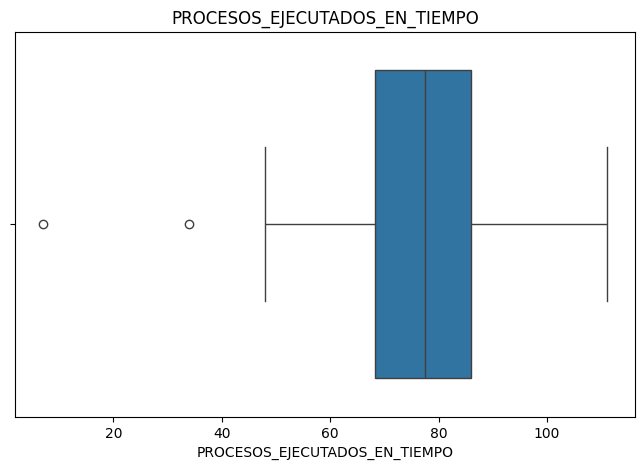

In [61]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['PROCESOS_EJECUTADOS_EN_TIEMPO'])
plt.title("PROCESOS_EJECUTADOS_EN_TIEMPO")
plt.show()

In [62]:
Q1 = df['PROCESOS_EJECUTADOS_EN_TIEMPO'].quantile(0.25)
Q3 = df['PROCESOS_EJECUTADOS_EN_TIEMPO'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

def outliers(row):
    val = row['PROCESOS_EJECUTADOS_EN_TIEMPO']
    nivel = row['NIVEL_DE_COMPLEJIDAD']
    if nivel in ['ALTA', 'MUY ALTA'] and (val < lower_bound or val > upper_bound) and pd.isna(row['N_TOTAL_DE_EJECUCIONES_DE_PROCESO']):
        return medianalto1
    elif nivel in ['ALTA', 'MUY ALTA'] and (val < lower_bound or val > upper_bound) and pd.notna(row['N_TOTAL_DE_EJECUCIONES_DE_PROCESO']):
        return row['N_TOTAL_DE_EJECUCIONES_DE_PROCESO'] * medianmeasure
    elif row['NIVEL_DE_COMPLEJIDAD'] == 'MEDIO' and (val < lower_bound or val > upper_bound) and pd.isna(row['N_TOTAL_DE_EJECUCIONES_DE_PROCESO']):
        return medianmedio1
    elif row['NIVEL_DE_COMPLEJIDAD'] == 'MEDIO' and (val < lower_bound or val > upper_bound) and pd.notna(row['N_TOTAL_DE_EJECUCIONES_DE_PROCESO']):
        return row['N_TOTAL_DE_EJECUCIONES_DE_PROCESO'] * medianmeasure
    elif row['NIVEL_DE_COMPLEJIDAD'] == 'BAJO' and (val < lower_bound or val > upper_bound) and pd.isna(row['N_TOTAL_DE_EJECUCIONES_DE_PROCESO']):
        return medianbajo1
    elif row['NIVEL_DE_COMPLEJIDAD'] == 'BAJO' and (val < lower_bound or val > upper_bound) and pd.notna(row['N_TOTAL_DE_EJECUCIONES_DE_PROCESO']):
        return row['N_TOTAL_DE_EJECUCIONES_DE_PROCESO'] * medianmeasure
    else:
        return val

df['PROCESOS_EJECUTADOS_EN_TIEMPO'] = df.apply(outliers, axis=1)

In [63]:
df1 = df[['NIVEL_DE_COMPLEJIDAD', 'N_TOTAL_DE_EJECUCIONES_DE_PROCESO']]
df1.dropna(inplace=True)
ma = df1[(df1['NIVEL_DE_COMPLEJIDAD'] == 'ALTO')]
medianalto1 = ma['N_TOTAL_DE_EJECUCIONES_DE_PROCESO'].median()
medianalto1
mm = df1[(df1['NIVEL_DE_COMPLEJIDAD'] == 'MEDIO')]
medianmedio1 = mm['N_TOTAL_DE_EJECUCIONES_DE_PROCESO'].median()
mb = df1[(df1['NIVEL_DE_COMPLEJIDAD'] == 'BAJO')]
medianbajo1 = mb['N_TOTAL_DE_EJECUCIONES_DE_PROCESO'].median()

<ipython-input-63-172683f4731e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


In [64]:
df['N_TOTAL_DE_EJECUCIONES_DE_PROCESO'] = df['N_TOTAL_DE_EJECUCIONES_DE_PROCESO'].astype(int)

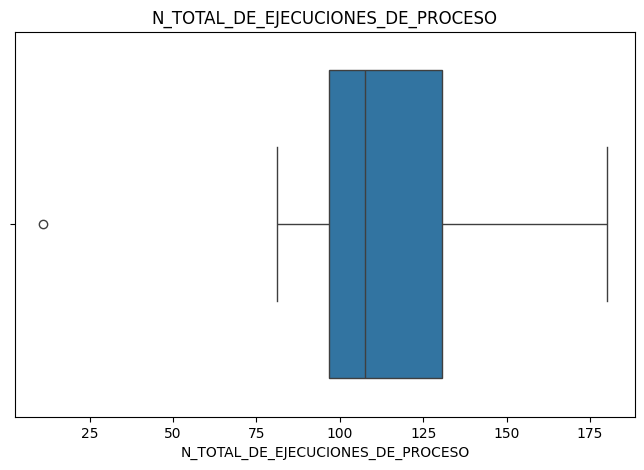

In [65]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['N_TOTAL_DE_EJECUCIONES_DE_PROCESO'])
plt.title("N_TOTAL_DE_EJECUCIONES_DE_PROCESO")
plt.show()

In [66]:
Q1 = df['N_TOTAL_DE_EJECUCIONES_DE_PROCESO'].quantile(0.25)
Q3 = df['N_TOTAL_DE_EJECUCIONES_DE_PROCESO'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

def outliers(row):
    val = row['N_TOTAL_DE_EJECUCIONES_DE_PROCESO']
    nivel = row['NIVEL_DE_COMPLEJIDAD']
    if nivel in ['ALTA', 'MUY ALTA'] and (val < lower_bound or val > upper_bound) and pd.isna(row['PROCESOS_EJECUTADOS_EN_TIEMPO']):
        return medianalto1
    elif nivel in ['ALTA', 'MUY ALTA'] and (val < lower_bound or val > upper_bound) and pd.notna(row['PROCESOS_EJECUTADOS_EN_TIEMPO']):
        return row['PROCESOS_EJECUTADOS_EN_TIEMPO'] / medianmeasure
    elif row['NIVEL_DE_COMPLEJIDAD'] == 'MEDIO' and (val < lower_bound or val > upper_bound) and pd.isna(row['PROCESOS_EJECUTADOS_EN_TIEMPO']):
        return medianmedio1
    elif row['NIVEL_DE_COMPLEJIDAD'] == 'MEDIO' and (val < lower_bound or val > upper_bound) and pd.notna(row['PROCESOS_EJECUTADOS_EN_TIEMPO']):
        return row['PROCESOS_EJECUTADOS_EN_TIEMPO'] / medianmeasure
    elif row['NIVEL_DE_COMPLEJIDAD'] == 'BAJO' and (val < lower_bound or val > upper_bound) and pd.isna(row['PROCESOS_EJECUTADOS_EN_TIEMPO']):
        return medianbajo1
    elif row['NIVEL_DE_COMPLEJIDAD'] == 'BAJO' and (val < lower_bound or val > upper_bound) and pd.notna(row['PROCESOS_EJECUTADOS_EN_TIEMPO']):
        return row['PROCESOS_EJECUTADOS_EN_TIEMPO'] / medianmeasure
    else:
        return val

df['N_TOTAL_DE_EJECUCIONES_DE_PROCESO'] = df.apply(outliers, axis=1)


In [67]:
df2 = df[['N_HITOS_PLANIFICADOS', 'N_HITOS_ALCANZADOS_EN_TIEMPO']]
df2.dropna(inplace=True)
df2['eficacia'] = df2['N_HITOS_ALCANZADOS_EN_TIEMPO']/df2['N_HITOS_PLANIFICADOS']
medianmeasure = df2['eficacia'].median()
medianmeasure

<ipython-input-67-6cf9a166d2fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)
<ipython-input-67-6cf9a166d2fa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['eficacia'] = df2['N_HITOS_ALCANZADOS_EN_TIEMPO']/df2['N_HITOS_PLANIFICADOS']


0.6045673076923077

In [68]:
df1 = df[['NIVEL_DE_COMPLEJIDAD', 'N_HITOS_PLANIFICADOS']]
df1.dropna(inplace=True)
ma = df1[(df1['NIVEL_DE_COMPLEJIDAD'] == 'ALTO')]
medianalto1 = ma['N_HITOS_PLANIFICADOS'].median()
medianalto1
mm = df1[(df1['NIVEL_DE_COMPLEJIDAD'] == 'MEDIO')]
medianmedio1 = mm['N_HITOS_PLANIFICADOS'].median()
mb = df1[(df1['NIVEL_DE_COMPLEJIDAD'] == 'BAJO')]
medianbajo1 = mb['N_HITOS_PLANIFICADOS'].median()

<ipython-input-68-0399e3ee5a99>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


In [69]:
df['N_HITOS_PLANIFICADOS'] = df['N_HITOS_PLANIFICADOS'].astype(int)

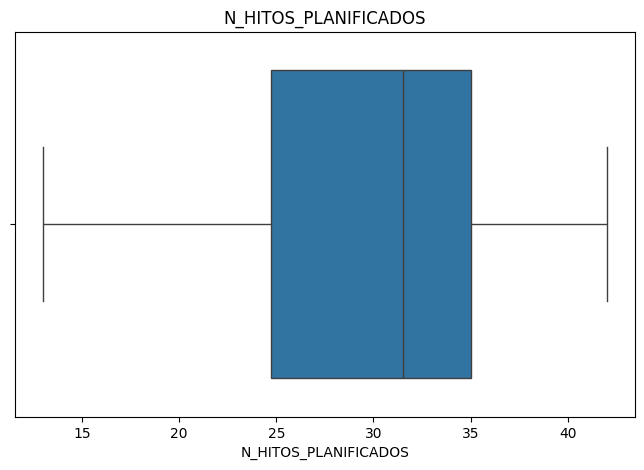

In [70]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['N_HITOS_PLANIFICADOS'])
plt.title("N_HITOS_PLANIFICADOS")
plt.show()

In [71]:
Q1 = df['N_HITOS_PLANIFICADOS'].quantile(0.25)
Q3 = df['N_HITOS_PLANIFICADOS'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

def outliers(row):
    val = row['N_HITOS_PLANIFICADOS']
    nivel = row['NIVEL_DE_COMPLEJIDAD']
    if nivel in ['ALTA', 'MUY ALTA'] and (val < lower_bound or val > upper_bound) and pd.isna(row['N_HITOS_ALCANZADOS_EN_TIEMPO']):
        return medianalto1
    elif nivel in ['ALTA', 'MUY ALTA'] and (val < lower_bound or val > upper_bound) and pd.notna(row['N_HITOS_ALCANZADOS_EN_TIEMPO']):
        return row['N_HITOS_ALCANZADOS_EN_TIEMPO'] / medianmeasure
    elif row['NIVEL_DE_COMPLEJIDAD'] == 'MEDIA' and (val < lower_bound or val > upper_bound) and pd.isna(row['N_HITOS_ALCANZADOS_EN_TIEMPO']):
        return medianmedio1
    elif row['NIVEL_DE_COMPLEJIDAD'] == 'MEDIA' and (val < lower_bound or val > upper_bound) and pd.notna(row['N_HITOS_ALCANZADOS_EN_TIEMPO']):
        return row['N_HITOS_ALCANZADOS_EN_TIEMPO'] / medianmeasure
    elif row['NIVEL_DE_COMPLEJIDAD'] == 'BAJA' and (val < lower_bound or val > upper_bound) and pd.isna(row['N_HITOS_ALCANZADOS_EN_TIEMPO']):
        return medianbajo1
    elif row['NIVEL_DE_COMPLEJIDAD'] == 'BAJA' and (val < lower_bound or val > upper_bound) and pd.notna(row['N_HITOS_ALCANZADOS_EN_TIEMPO']):
        return row['N_HITOS_ALCANZADOS_EN_TIEMPO'] / medianmeasure
    else:
        return val

df['N_HITOS_PLANIFICADOS'] = df.apply(outliers, axis=1)
lower_bound

np.float64(9.375)

In [72]:
df1 = df[['NIVEL_DE_COMPLEJIDAD', 'N_HITOS_ALCANZADOS_EN_TIEMPO']]
df1.dropna(inplace=True)
ma = df1[(df1['NIVEL_DE_COMPLEJIDAD'] == 'ALTA')]
medianalto1 = ma['N_HITOS_ALCANZADOS_EN_TIEMPO'].median()
medianalto1
mm = df1[(df1['NIVEL_DE_COMPLEJIDAD'] == 'MEDIA')]
medianmedio1 = mm['N_HITOS_ALCANZADOS_EN_TIEMPO'].median()
mb = df1[(df1['NIVEL_DE_COMPLEJIDAD'] == 'BAJA')]
medianbajo1 = mb['N_HITOS_ALCANZADOS_EN_TIEMPO'].median()

<ipython-input-72-5ca168ff4de5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


In [73]:
df['N_HITOS_ALCANZADOS_EN_TIEMPO'] = df['N_HITOS_ALCANZADOS_EN_TIEMPO'].astype(int)

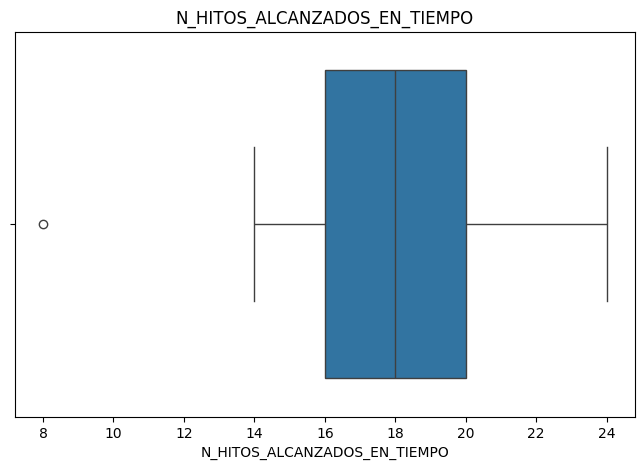

In [74]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['N_HITOS_ALCANZADOS_EN_TIEMPO'])
plt.title("N_HITOS_ALCANZADOS_EN_TIEMPO")
plt.show()

In [75]:
Q1 = df['N_HITOS_ALCANZADOS_EN_TIEMPO'].quantile(0.25)
Q3 = df['N_HITOS_ALCANZADOS_EN_TIEMPO'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

def outliers(row):
    val = row['N_HITOS_ALCANZADOS_EN_TIEMPO']
    nivel = row['NIVEL_DE_COMPLEJIDAD']
    if nivel in ['ALTA', 'MUY ALTA'] and (val < lower_bound or val > upper_bound) and pd.isna(row['N_HITOS_PLANIFICADOS']):
        return medianalto1
    elif nivel in ['ALTA', 'MUY ALTA'] and (val < lower_bound or val > upper_bound) and pd.notna(row['N_HITOS_PLANIFICADOS']):
        return row['N_HITOS_PLANIFICADOS'] * medianmeasure
    elif row['NIVEL_DE_COMPLEJIDAD'] == 'MEDIA' and (val < lower_bound or val > upper_bound) and pd.isna(row['N_HITOS_PLANIFICADOS']):
        return medianmedio1
    elif row['NIVEL_DE_COMPLEJIDAD'] == 'MEDIA' and (val < lower_bound or val > upper_bound) and pd.notna(row['N_HITOS_PLANIFICADOS']):
        return row['N_HITOS_PLANIFICADOS'] * medianmeasure
    elif row['NIVEL_DE_COMPLEJIDAD'] == 'BAJA' and (val < lower_bound or val > upper_bound) and pd.isna(row['N_HITOS_PLANIFICADOS']):
        return medianbajo1
    elif row['NIVEL_DE_COMPLEJIDAD'] == 'BAJA' and (val < lower_bound or val > upper_bound) and pd.notna(row['N_HITOS_PLANIFICADOS']):
        return row['N_HITOS_PLANIFICADOS'] * medianmeasure
    else:
        return val

df['N_HITOS_ALCANZADOS_EN_TIEMPO'] = df.apply(outliers, axis=1)


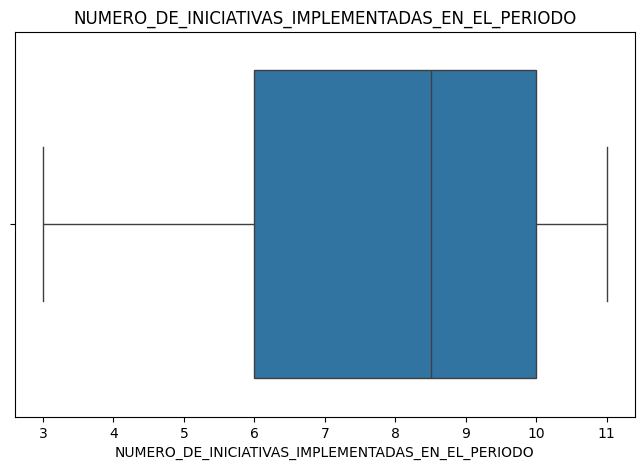

In [76]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['NUMERO_DE_INICIATIVAS_IMPLEMENTADAS_EN_EL_PERIODO'])
plt.title("NUMERO_DE_INICIATIVAS_IMPLEMENTADAS_EN_EL_PERIODO")
plt.show()

In [77]:
Q1 = df['NUMERO_DE_INICIATIVAS_IMPLEMENTADAS_EN_EL_PERIODO'].quantile(0.25)
Q3 = df['NUMERO_DE_INICIATIVAS_IMPLEMENTADAS_EN_EL_PERIODO'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

def outliers(row):
    val = row['NUMERO_DE_INICIATIVAS_IMPLEMENTADAS_EN_EL_PERIODO']
    nivel = row['NIVEL_DE_COMPLEJIDAD']
    if nivel in ['ALTA', 'MUY ALTA'] and (val < lower_bound or val > upper_bound):
        return df[df['NIVEL_DE_COMPLEJIDAD'] == "ALTA"]['NUMERO_DE_INICIATIVAS_IMPLEMENTADAS_EN_EL_PERIODO'].median()
    elif nivel == 'MEDIA' and (val < lower_bound or val > upper_bound):
        return df[df['NIVEL_DE_COMPLEJIDAD'] == "MEDIA"]['NUMERO_DE_INICIATIVAS_IMPLEMENTADAS_EN_EL_PERIODO'].median()
    elif row['NIVEL_DE_COMPLEJIDAD'] == 'BAJA' and (val < lower_bound or val > upper_bound):
        return df[df['NIVEL_DE_COMPLEJIDAD'] == "BAJA"]['NUMERO_DE_INICIATIVAS_IMPLEMENTADAS_EN_EL_PERIODO'].median()
    else:
        return val

df['NUMERO_DE_INICIATIVAS_IMPLEMENTADAS_EN_EL_PERIODO'] = df.apply(outliers, axis=1)

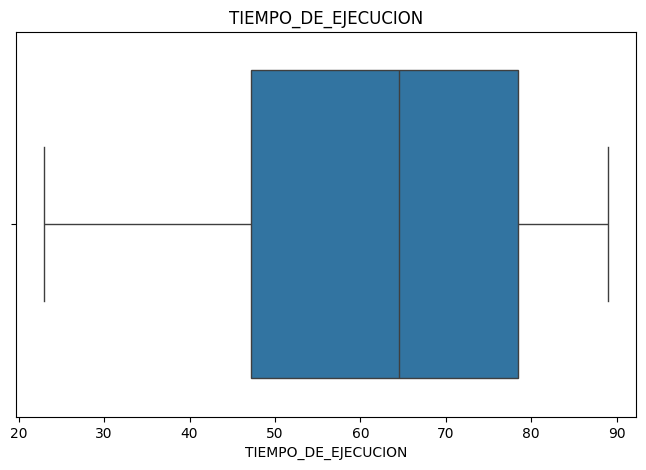

In [78]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['TIEMPO_DE_EJECUCION'])
plt.title("TIEMPO_DE_EJECUCION")
plt.show()

In [79]:
Q1 = df['TIEMPO_DE_EJECUCION'].quantile(0.25)
Q3 = df['TIEMPO_DE_EJECUCION'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

def outliers(row):
    val = row['TIEMPO_DE_EJECUCION']
    nivel = row['NIVEL_DE_COMPLEJIDAD']
    if nivel in ['ALTA', 'MUY ALTA'] and (val < lower_bound or val > upper_bound):
        return df[df['NIVEL_DE_COMPLEJIDAD'] == "ALTA"]['TIEMPO_DE_EJECUCION'].median()
    elif nivel == 'MEDIA' and (val < lower_bound or val > upper_bound):
        return df[df['NIVEL_DE_COMPLEJIDAD'] == "MEDIA"]['TIEMPO_DE_EJECUCION'].median()
    elif row['NIVEL_DE_COMPLEJIDAD'] == 'BAJA' and (val < lower_bound or val > upper_bound):
        return df[df['NIVEL_DE_COMPLEJIDAD'] == "BAJA"]['TIEMPO_DE_EJECUCION'].median()
    else:
        return val

df['TIEMPO_DE_EJECUCION'] = df.apply(outliers, axis=1)

In [80]:
df

N_INICIATIVA                                INICIATIVA   PORTAFOLIO  \
0              1               Contratación de proveedores  RMateriales   
1              2  Optimización de resguardo de documentos.  RMateriales   
2              3         Optimización de estados de cuenta  RMateriales   
3              4             Proyectos de inversión nuevos  RMateriales   
4              5                                Mensajería  RMateriales   
5              6      Arrendamiento de sucursales y ATM's   Operaciones   
6              7                       Servicio al cliente   Fiduciario   
7              8          Instalción y renovación de ATM's  RMateriales   
8              9           Reclamaciones por fallecimiento  RMateriales   
9             10                     Cartas de Instrucción   Fiduciario   
10            11                         Pagos Programados   Fiduciario   
11            12                     Gestión de expediente   Fiduciario   
12            13                      Actualizaciones SIFE   Fiduciario   
13            14             Organismos de mejora continua   Fiduciario   
14            15                         Gestión de Tokens  Operaciones   
15            16                     Nuevas Colaboraciones   Fiduciario   
16            17                               Tablero MTM  Operaciones   
17            18                               Indicadores   Fiduciario   
18            19                     Instrucciones Legales   Fiduciario   
19            20                                  Cobranza   Fiduciario   
20            21                          Gestión de Pagos  Controlaría   
21            22                     Cobranza Domicialiada  Operaciones   
22            23                      Seguros PTJ & Cartas  Operaciones   
23            24                  Mantenimiento Preventivo  RMateriales   
24            25                         Comedor Ejecutivo  RMateriales   
25            26                       Riesgos Asegurables  RMateriales   

                    PROGRAMA ESPECIALISTA_INICIATIVA NIVEL_DE_COMPLEJIDAD  \
0        Cajeros Automaticos         Anabel Gonzalez                 ALTO   
1   Mantenimiento Correctivo        Antonio Arellano                MEDIO   
2                 Mensajeria            Marta Garcia                 ALTO   
3        Cajeros Automaticos              Raul Perez                MEDIO   
4                 Mensajeria             Monica Ruiz                 ALTO   
5                 Mensajeria           Mayra Sevilla                 ALTO   
6   Mantenimiento Correctivo           Mayra Sevilla                 ALTO   
7        Cajeros Automaticos         Anabel Gonzalez                MEDIO   
8   Mantenimiento Correctivo              Raul Perez                MEDIO   
9     Atencion a Autoridades              Raul Perez                 ALTO   
10                Mensajeria        Antonio Arellano                MEDIO   
11                Mensajeria        Antonio Arellano                 ALTO   
12                Mensajeria             Monica Ruiz                 ALTO   
13                Mensajeria           Mayra Sevilla                MEDIO   
14                Mensajeria         Anabel Gonzalez                 ALTO   
15  Mantenimiento Correctivo         Anabel Gonzalez                MEDIO   
16       Cajeros Automaticos              Raul Perez                 BAJO   
17             Mantenimiento        Antonio Arellano                 ALTO   
18              BO Derivados            Marta Garcia                 ALTO   
19    Atencion a Autoridades              Raul Perez                 ALTO   
20  Mantenimiento Correctivo           Mayra Sevilla                 ALTO   
21                Mensajeria           Mayra Sevilla                MEDIO   
22       Cajeros Automaticos        Antonio Arellano                MEDIO   
23                Mensajeria         Anabel Gonzalez                MEDIO   
24  Mantenimiento Correctivo             Monica Ruiz 

In [81]:
df[['N_TOTAL_DE_EJECUCIONES_DE_PROCESO', 'PROCESOS_EJECUTADOS_EN_TIEMPO', 'NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA', 'SOLICITUDES_DE_MEJORA_RECIBIDAS', 'SOLICITUDES_DE_MEJORA_IMPLEMENTADAS']] = np.floor(df[['N_TOTAL_DE_EJECUCIONES_DE_PROCESO', 'PROCESOS_EJECUTADOS_EN_TIEMPO', 'NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA', 'SOLICITUDES_DE_MEJORA_RECIBIDAS', 'SOLICITUDES_DE_MEJORA_IMPLEMENTADAS']]).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 41 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   N_INICIATIVA                                       26 non-null     int64         
 1   INICIATIVA                                         26 non-null     object        
 2   PORTAFOLIO                                         26 non-null     object        
 3   PROGRAMA                                           26 non-null     object        
 4   ESPECIALISTA_INICIATIVA                            26 non-null     object        
 5   NIVEL_DE_COMPLEJIDAD                               26 non-null     object        
 6   ESTATUS                                            26 non-null     object        
 7   ETAPA                                              26 non-null     object        
 8   FECHA_INICIO          

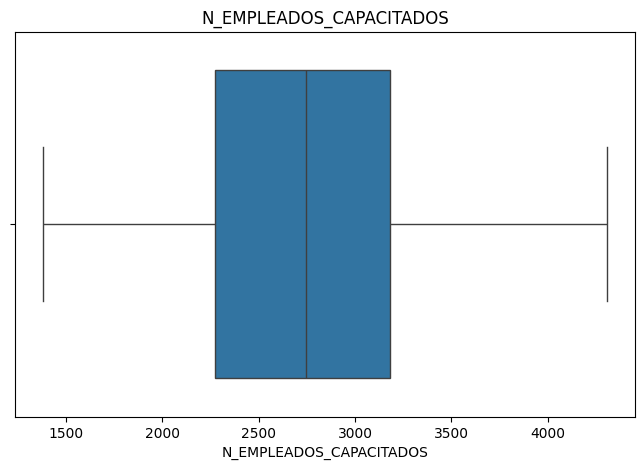

In [82]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['N_EMPLEADOS_CAPACITADOS'])
plt.title("N_EMPLEADOS_CAPACITADOS")
plt.show()

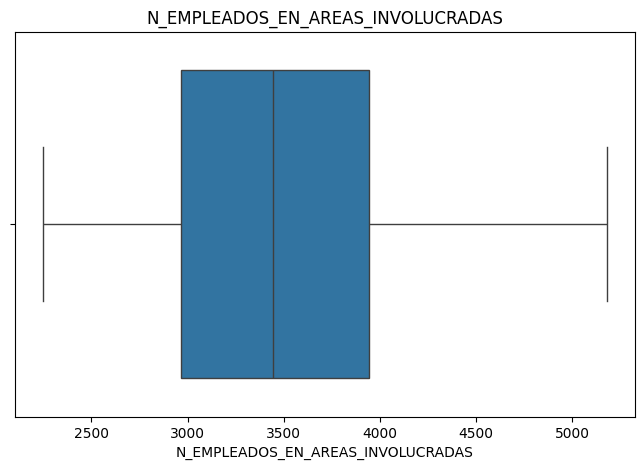

In [93]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['N_EMPLEADOS_EN_AREAS_INVOLUCRADAS'])
plt.title("N_EMPLEADOS_EN_AREAS_INVOLUCRADAS")
plt.show()

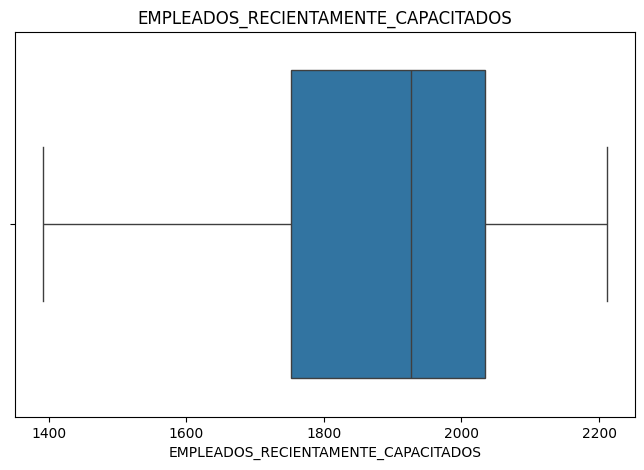

In [92]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['EMPLEADOS_RECIENTAMENTE_CAPACITADOS'])
plt.title("EMPLEADOS_RECIENTAMENTE_CAPACITADOS")
plt.show()

In [91]:
from scipy.stats import zscore
# Compute Z-scores for target columns
z_scores = np.abs(zscore(df[employee_cols]))

# Replace outliers with NaN
df_outliers = df.copy()
df_outliers[employee_cols] = df[employee_cols].mask(z_scores > 3)

# Apply KNN imputation
imputer = KNNImputer(n_neighbors=3)
df_outliers[employee_cols] = imputer.fit_transform(df_outliers[employee_cols])

In [ ]:
imputer = KNNImputer(n_neighbors=3)
df_imputed = df.copy()
df_imputed[employee_cols] = imputer.fit_transform(df_outliers[employee_cols])

In [83]:
df[['N_TOTAL_DE_EJECUCIONES_DE_PROCESO', 'PROCESOS_EJECUTADOS_EN_TIEMPO', 'NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA', 'SOLICITUDES_DE_MEJORA_RECIBIDAS', 'SOLICITUDES_DE_MEJORA_IMPLEMENTADAS']]

N_TOTAL_DE_EJECUCIONES_DE_PROCESO  PROCESOS_EJECUTADOS_EN_TIEMPO  \
0                                 123                             94   
1                                  99                             72   
2                                  83                             63   
3                                  86                             77   
4                                 131                             56   
5                                 144                             67   
6                                 143                             77   
7                                 108                             97   
8                                 129                            100   
9                                 100                             95   
10                                107                             80   
11                                119                             75   
12                                151                             94   
13                                 96                             73   
14                                130                             48   
15                                 89                             83   
16                                 11                              7   
17                                150                             78   
18                                 81                             81   
19                                166                             86   
20                                180                            111   
21                                107                             77   
22                                 84                             77   
23                                116                             83   
24                                100                             86   
25                                103                             60   

    NÚMERO_DE_EMPLEADOS_QUE_ADOPTARON_LA_INICIATIVA  \
0                                              2242   
1                                              1578   
2                                              2384   
3                                               999   
4                                              2118   
5                                              2173   
6                                              2563   
7                                              2162   
8                                               992   
9                                              2008   
10                                             1625   
11                                             2045   
12                                             2487   
13                                             1910   
14                                             2094   
15                                             1269   
16                                             2006   
17                                             2121   
18                                             2337   
19                                             2297   
20                                             2145   
21                                             1651   
22                                              963   
23                                             1371   
24                                             1644   
25                                             2091   

    SOLICITUDES_DE_MEJORA_RECIBIDAS  SOLICITUDES_DE_MEJORA_IMPLEMENTADAS  
0                              2602                                 2011  
1                              1873                                 1688  
2                              2947                                 2073  
3                              2133                                 1217  
4                              2885                                 2446  
5                              2856                                 2001  
6                              3135             

In [84]:
# Loop through all columns with dtype int64 and convert to Python int
for col in df.select_dtypes(include='int64').columns:
    df[col] = df[col].astype(int)


In [85]:
df['AHORRO_REAL_GENERADO']

0     2.223530e+06
1     1.237100e+06
2     2.303019e+06
3     1.224389e+06
4     1.249850e+06
5     1.662176e+06
6     2.166012e+06
7     2.622124e+06
8     1.643553e+06
9     1.154294e+06
10    1.331828e+06
11    1.674436e+06
12    2.403866e+06
13    1.323415e+06
14    1.857518e+06
15    1.581216e+06
16    2.165240e+06
17    2.285333e+06
18    2.472914e+06
19    1.895642e+06
20    2.256989e+06
21    1.495931e+06
22    1.454230e+06
23    1.312775e+06
24    1.003435e+06
25    2.164469e+06
Name: AHORRO_REAL_GENERADO, dtype: float64

In [86]:
df.to_csv("/content/drive/MyDrive/Banorte/Layout Final Limpio1.csv", index = False)